<h1> IGRA2 Station Network Visualization </h1> 
<br>
This notebook provides an exploratory analysis of the Integrated Global Radiosonde Archive Version 2 (IGRA2) station network, visualizing the geographic distribution and temporal availability of over 2,700 radiosonde stations worldwide. By mapping station locations and examining their operational periods, this analysis serves as a foundation for informed station selection in subsequent climatological studies and data processing workflows.

<br><br>
All the data is downloaded from https://www.ncei.noaa.gov/data/integrated-global-radiosonde-archive/
<br><br>

In [1]:
# Modify the parameters in this cell according to your requirements


# Path of the repository folder
path_repo = '/home/david/repos/radiosonde_climatology_analysis'

<br><br><br>
<br><br><br>

## 1. Visualize available stations

Here we create a map to display all the available stations from the metadata. 

This allows us to visually inspect their locations and choose a station for calculating climatologies later.

In [2]:
############
### map's limits

lat_min = -10
lat_max = 30
lon_min = -120
lon_max = -30

In [3]:
############
### stations inside the map's area

docs_folder = f'{path_repo}/docs/'

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patheffects import withStroke
import matplotlib.patches as patches


df_DataFormat = pd.read_csv(f'{docs_folder}/format_stations_metadata.csv')
colspecs = []
selected_variables = df_DataFormat['col_name'].to_list()
for i_var in df_DataFormat.index:
    var_i = df_DataFormat.loc[i_var, 'col_name']
    if not(var_i in selected_variables): continue
    idx_ini_i = df_DataFormat.loc[i_var, 'start_icol']
    idx_end_i = df_DataFormat.loc[i_var, 'end_icol']
    colspecs += [(idx_ini_i, idx_end_i)]

metadatafile = f'{docs_folder}/igra2-station-list.txt'
with open(metadatafile) as file:
    df_stations = pd.read_fwf(metadatafile, colspecs=colspecs, header=None, names=selected_variables)

df_stations['n_sondes'] = df_stations['n_sondes'].astype(int)
df_stations['end_year'] = df_stations['end_year'].astype(int)
df_stations['start_year'] = df_stations['start_year'].astype(int)
df_stations['nyears'] = df_stations['end_year']-df_stations['start_year']+1
df_stations

# temporal filer
df_stations = df_stations.loc[df_stations['nyears']>=30*0.8]
# According to best practices guide (WMO), a climatology should be based on at least 80% data coverage over a 30-year reference period.
# Check on the actual availability of the information, this is just a indicator

## spatial filter
df_stations = df_stations.loc[(df_stations['lat']>=lat_min)&(df_stations['lat']<=lat_max)]
df_stations = df_stations.loc[(df_stations['lon']>=lon_min)&(df_stations['lon']<=lon_max)]
df_stations.reset_index(drop=True,inplace=True)

df_stations

,id,lat,lon,height,name,start_year,end_year,n_sondes,nyears
0,ACM00078861,17.1170,-61.7830,10.0,COOLIDGE FIELD (UA),1947,1993,13896,47
1,BBM00078954,13.0716,-59.4922,56.6,GRANTLEY ADAMS,1965,2025,31599,61
2,BFM00078073,25.0500,-77.4667,7.0,NASSAU AIRPORT NEW PROVIDENCE,1977,2020,14156,44
3,BHM00078583,17.5333,-88.3000,5.0,BELIZE/PHILLIP GOLDSTON INTL.,1980,2025,21380,46
4,BRM00082022,2.8490,-60.6943,83.5,BOA VISTA (AERO),1977,2025,11382,49
...,...,...,...,...,...,...,...,...,...
77,VEM00080413,10.2500,-67.6500,436.0,MARACAY - B.A. SUCRE,1966,2014,5220,49
78,VEM00080444,8.1500,-63.5500,48.0,CIUDAD BOLIVAR,1974,2008,641,35
79,VEM00080447,7.8500,-72.4500,377.0,SAN ANTONIO DEL TACHIRA,1966,2013,3694,48
80,VEM00080450,7.9000,-67.4167,47.0,SAN FERNANDO DE APURE,1974,2011,1404,38


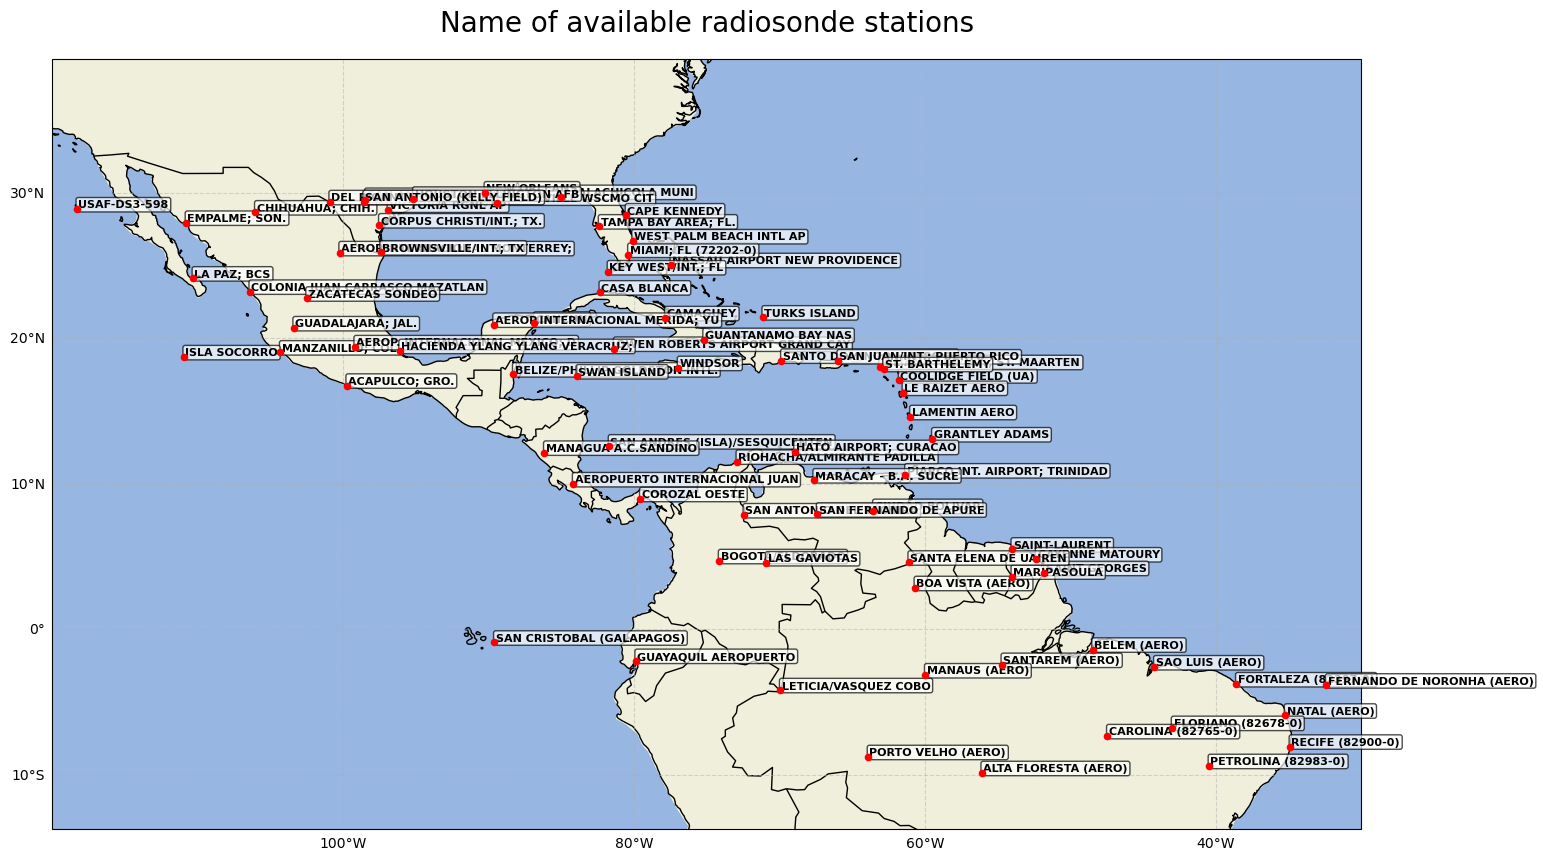

In [4]:
############
### map

fig, ax = plt.subplots(1,1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_min, lon_max, lat_min, lat_max])


for row_i in df_stations.index:
    lat_i = df_stations.loc[row_i,'lat']
    lon_i = df_stations.loc[row_i,'lon']
    text_i = df_stations.loc[row_i,'name']
    ax.scatter(lon_i, lat_i, color='red', s=20, zorder=5)
    
    # Add text with offset and styling to reduce overlap
    ax.text(lon_i + 0.1, lat_i + 0.1, text_i, 
            color='black', fontsize=8, weight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7),
            zorder=4)

ax.set_title('Name of available radiosonde stations', fontsize=20, pad=20)
plt.show()

<br><br><br>
<br><br><br>

You can explore the metadata and available radiosonde data for each station using the `df_stations` DataFrame, and visualize their locations on the map.

You can select any station you are interested in. For this example, I will continue with the radiosonde station in Bogotá (ID = COM00080222).

In [5]:
df_stations.loc[df_stations['name'].str.contains('BOGOTA')]

,id,lat,lon,height,name,start_year,end_year,n_sondes,nyears
21,COM00080222,4.7,-74.15,2547.0,BOGOTA/ELDORADO,1960,2025,26176,66
